# 1.Collect Initial Data

In [8]:
import glob
import os
import numpy as np
import seaborn as sb
sb.set()
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [9]:
cot_all = pd.read_excel('..\\..\\Datos\\working\\cotizaciones_all.xlsx')
cot_all.shape

(16592, 41)

In [10]:
neg_all = pd.read_excel('..\\..\\Datos\\working\\negocios_all.xlsx')
neg_all.shape

(2347, 49)

In [11]:
def bla(column):
    dfp = df[(~df[column].isnull())] #personas que entregaron el atributo
    p_p_total = len(dfp.RUT.unique())
    print('Personas que entregaron {}'.format(column))
    print('# ',p_p_total)
    print('% del total de personas: ',p_p_total/p_total*100,'%')

    dnf_rut = dnf[~dnf[column].isnull()] # filas que no hicieron negocio
    pnf_p_total = len(dnf_rut.RUT.unique()) #personas que no hicieron negocio
    print('Personas NO hicieron Negocio y que entregaron {}'.format(column))
    print('# ',pnf_p_total)
    print('% el total de no negocio',pnf_p_total/pnf_total*100,'%')

    dnt_rut = dnt[~dnt[column].isnull()]
    pnt_p_total = len(dnt_rut.RUT.unique())
    print('Personas que hicieron Negocio y entregaron {}'.format(column))
    print('# ',pnt_p_total)
    print('% del total de negocio',pnt_p_total/pnt_total*100,'%')

# 1 Cotizacion y atributo negocio
Cuando se habla de "negocio" son personas que llegaron al proceso de negocio, esto no quiere decir que si compraron un inmueble

In [12]:
print('Personas distintas que hicieron negocios segun los datos de negociaciones')
print(len(neg_all.RUT.unique()))

Personas distintas que hicieron negocios segun los datos de negociaciones
1103


In [77]:
# ruts de los clientes en negocio
neg_ruts = neg_all['RUT'].unique().tolist()

cot_neg = cot_all.copy()
cot_neg['Negocio'] = cot_all['RUT'].isin(neg_ruts)

print(neg_all.shape[0])
print("Nro Filas en cot que tienen ruts en neg :", cot_neg.loc[cot_neg['Negocio']==True].shape[0])


2347
Nro Filas en cot que tienen ruts en neg : 5697


In [78]:
cot_neg.columns

Index(['ID', 'Fecha Cotizacion', 'Medio', 'Tipo de Medio', 'Proyecto', 'Etapa',
       'Productos', 'Presencial', 'Remoto', 'Jefe Comercial',
       'Ejecutivo Comercial', 'Total Productos', 'Descuentos',
       'Valor Final Venta', 'RUT', 'Nombre', 'Apellido 1', 'Apellido 2',
       'Nombre Completo', 'Telefono', 'Celular', 'Direccion', 'Region',
       'Provincia', 'Comuna', 'Correo Electronico', 'Sexo', 'Estado Civil',
       'Rango Edad', 'Fecha Nacimiento', 'Tipo Cliente', 'Razon Social',
       'Giro', 'Nacionalidad', 'N° Grupo Familiar', 'Actividad', 'Cargo',
       'Situacion Laboral', 'Empleador', 'Antiguedad Laboral', 'Profesión',
       'Negocio'],
      dtype='object')

In [15]:
df = cot_neg.copy()


In [81]:
def neg_noneg(column):
    dfp = df[(~df[column].isnull())] #personas que entregaron el atributo
    p_p_total = len(dfp.RUT.unique())

    dnf_rut = dnf[~dnf[column].isnull()] # filas que no hicieron negocio
    pnf_p_total = len(dnf_rut.RUT.unique()) #personas que no hicieron negocio

    dnt_rut = dnt[~dnt[column].isnull()]
    pnt_p_total = len(dnt_rut.RUT.unique())
    
    return p_p_total, pnf_p_total, pnt_p_total

In [98]:
df = cot_neg
tab_info=pd.DataFrame(df.dtypes).T.rename(index={0:'Tipo Columna'})
tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'Valores Nulos'}))
# tab_info=tab_info.append(pd.DataFrame(cot_all.isnull().sum()/cot_all.shape[0]*100).T.rename(index={0:'null values (%)'}))
df_all_info = tab_info.T
total_filas = df.shape[0]

personas_in_feature = []

# df.dropna(axis=1, inplace=True)
df_personas = df.groupby('RUT')

tmp_per_dict = dict()
neg = []
no_neg = []

for group, frame in df_personas:
    for feature in df.columns.tolist():
        if feature not in tmp_per_dict.keys():
            tmp_per_dict[feature] = dict()
            tmp_per_dict[feature]['Total'] = 0
            tmp_per_dict[feature]['Negocio'] = 0
            tmp_per_dict[feature]['No Negocio'] = 0
            
        if False in frame[feature].isnull().tolist():
            tmp_per_dict[feature]['Total'] += 1


In [99]:
print(df.columns.shape[0], len(tmp_per_dict.keys()))
df_all_info['Valores Unicos'] = [df[x].nunique() for x in df.columns]
df_all_info['Total Filas'] = total_filas
df_all_info['Entregaron'] = [tmp_per_dict[x]['Total'] for x in df.columns.tolist()]
df_all_info['Negocio'] = [neg_noneg(x)[2] for x in df.columns.tolist()]
df_all_info['No Negocio'] = [neg_noneg(x)[1] for x in df.columns.tolist()]
df_all_info

42 42


,Tipo Columna,Valores Nulos,Valores Unicos,Total Filas,Entregaron,Negocio,No Negocio
ID,int64,0,16592,16592,6184,1102,5082
Fecha Cotizacion,datetime64[ns],0,16589,16592,6184,1102,5082
Medio,object,0,12,16592,6184,1102,5082
Tipo de Medio,object,532,31,16592,5990,1102,4888
Proyecto,object,0,5,16592,6184,1102,5082
Etapa,object,0,12,16592,6184,1102,5082
Productos,object,83,3534,16592,6182,1102,5080
Presencial,object,2027,2,16592,5438,982,4456
Remoto,object,3310,2,16592,4984,903,4081
Jefe Comercial,object,0,3,16592,6184,1102,5082


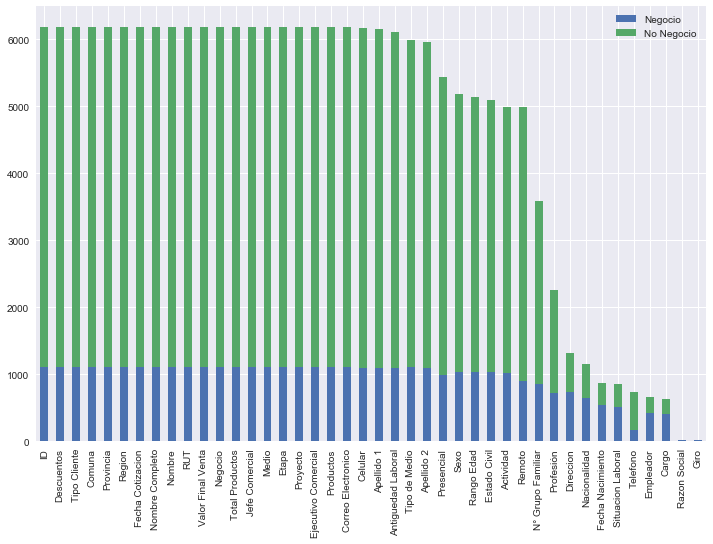

In [100]:
df_all_info.sort_values(by='Entregaron', ascending=False)[['Negocio', 'No Negocio']].plot(kind='bar', stacked=True, figsize=(12,8))

### ¿Cuantas personas tiene el data set Cotizacion?

In [83]:
p_total = len(df.RUT.unique())
print(p_total)


6184


### ¿Cuantas personas tiene el data set Negocio?

In [84]:
p_total_neg = len(neg_all.RUT.unique())
print(p_total_neg)

1103


## 1. 1 Negocio

In [85]:
# ¿Cuantas personas hicieron negocio? 
dnt = df[df.Negocio == True] #filas que hicieron negocio
pnt_total = len(dnt.RUT.unique()) # personas que hicieron negocio
print('¿Cuantas personas hicieron negocio? ')
print('#',pnt_total)

# ¿Cuantas personas no hicieron negocio?
dnf = df[df.Negocio == False] # filas que no hicieron negocio
pnf_total = len(dnf.RUT.unique()) # personas que no hicieron negocio
print('¿Cuantas personas no hicieron negocio?')
print('# ',pnf_total)

¿Cuantas personas hicieron negocio? 
# 1102
¿Cuantas personas no hicieron negocio?
#  5082


In [86]:
# Personas con escritura y entrega realizada
personas_ventas = []
search = ['Escriturado', 'Entregado']

for group, frame in neg_all.groupby('RUT'):
    if search[0] in frame['Estado'].values or search[1] in frame['Estado'].values:
        personas_ventas.append(group)

print(len(personas_ventas))

288


### 1.1.2 ¿Cuantos negocios hizo cada persona?

In [87]:
neg_all.columns

Index(['ID', 'Fecha Cotizacion', 'ID Cotizacion', 'Medio', 'Tipo de Medio',
       'Proyecto', 'Etapa', 'Productos', 'Jefe Comercial',
       'Ejecutivo Comercial', 'Total Productos', 'Descuentos',
       'Valor Final Venta', 'Estado', 'Estado Comercial', 'Fecha Promesa',
       'Fecha Escritura', 'Fecha Desistimiento', 'Fecha Resciliacion',
       'Motivo Desis/Resc', 'Description Desis/Resc',
       'Resciliacion por Modificacion', 'RUT', 'Nombre', 'Apellido 1',
       'Apellido 2', 'Nombre Completo', 'Telefono', 'Celular', 'Direccion',
       'Region', 'Provincia', 'Comuna', 'Correo Electronico', 'Sexo',
       'Estado Civil', 'Rango Edad', 'Fecha Nacimiento', 'Tipo Cliente',
       'Razon Social', 'Giro', 'Nacionalidad', 'N° Grupo Familiar',
       'Actividad', 'Cargo', 'Situacion Laboral', 'Empleador',
       'Antiguedad Laboral', 'Profesión'],
      dtype='object')

In [88]:
cantidad_negocios = dict()
cantidad_negocios_personas = []
for group, frame in neg_all.groupby('RUT'):
    cantidad_negocios[group] = frame['ID'].count()
    cantidad_negocios_personas.append(frame['ID'].count())

print('Promedio negocio por persona' ,np.mean(cantidad_negocios_personas))

Promedio negocio por persona 2.127833182230281


### 1.1.2 ¿Cuanto es el tiempo promedio entre fechas de cotizaciones? En dias

In [89]:
fecha_rut = dict()
for group, frame in cot_all.groupby('RUT'):
    fecha_rut[group] = frame['Fecha Cotizacion'][0:]

In [90]:
cot_all.RUT.head()

0    14273551-2
1    13309954-9
2    14583354-k
3     7188659-k
4    13377606-0
Name: RUT, dtype: object

## 1.2 Actividad

In [91]:
bla('Actividad')

Personas que entregaron Actividad
#  4987
% del total de personas:  80.64359637774902 %
Personas NO hicieron Negocio y que entregaron Actividad
#  3972
% el total de no negocio 78.1582054309327 %
Personas que hicieron Negocio y entregaron Actividad
#  1015
% del total de negocio 92.10526315789474 %


## 1.3 Profesión

In [17]:
bla('Profesión')

Personas que entregaron Profesión
#  2251
%  36.400388098318246 %
Personas NO hicieron Negocio y que entregaron Profesión
#  1537
%  30.24399842581661 %
Personas que hicieron Negocio y entregaron Profesión
#  714
%  64.7912885662432 %


## 1.4 Nro de Grupo Familiar

In [18]:
bla('N° Grupo Familiar')

Personas que entregaron N° Grupo Familiar
#  3579
%  57.87516170763261 %
Personas NO hicieron Negocio y que entregaron N° Grupo Familiar
#  2728
%  53.67965367965368 %
Personas que hicieron Negocio y entregaron N° Grupo Familiar
#  851
%  77.22323049001815 %


## 1.5 Dirección

In [19]:
bla('Direccion')

Personas que entregaron Direccion
#  1324
%  21.410090556274255 %
Personas NO hicieron Negocio y que entregaron Direccion
#  583
%  11.471861471861471 %
Personas que hicieron Negocio y entregaron Direccion
#  741
%  67.24137931034483 %


## 1.6 Fecha Nacimiento

In [20]:
bla('Fecha Nacimiento')

Personas que entregaron Fecha Nacimiento
#  871
%  14.084734799482534 %
Personas NO hicieron Negocio y que entregaron Fecha Nacimiento
#  336
%  6.6115702479338845 %
Personas que hicieron Negocio y entregaron Fecha Nacimiento
#  535
%  48.548094373865695 %


## 1.7 Situación laboral

In [21]:
bla('Situacion Laboral')

Personas que entregaron Situacion Laboral
#  857
%  13.858344113842172 %
Personas NO hicieron Negocio y que entregaron Situacion Laboral
#  345
%  6.78866587957497 %
Personas que hicieron Negocio y entregaron Situacion Laboral
#  512
%  46.46098003629764 %


## 1.8 Empleador

In [22]:
bla('Empleador')

Personas que entregaron Empleador
#  662
%  10.705045278137128 %
Personas NO hicieron Negocio y que entregaron Empleador
#  240
%  4.7225501770956315 %
Personas que hicieron Negocio y entregaron Empleador
#  422
%  38.294010889292196 %


## 1.9 Situación laboral

In [23]:
bla('Antiguedad Laboral')

Personas que entregaron Antiguedad Laboral
#  6110
%  98.80336351875808 %
Personas NO hicieron Negocio y que entregaron Antiguedad Laboral
#  5019
%  98.7603305785124 %
Personas que hicieron Negocio y entregaron Antiguedad Laboral
#  1091
%  99.00181488203266 %


## 1.9 Telefono

In [24]:
bla('Telefono')

Personas que entregaron Telefono
#  734
%  11.86934023285899 %
Personas NO hicieron Negocio y que entregaron Telefono
#  560
%  11.019283746556475 %
Personas que hicieron Negocio y entregaron Telefono
#  174
%  15.789473684210526 %


## 1. 2 Some plots

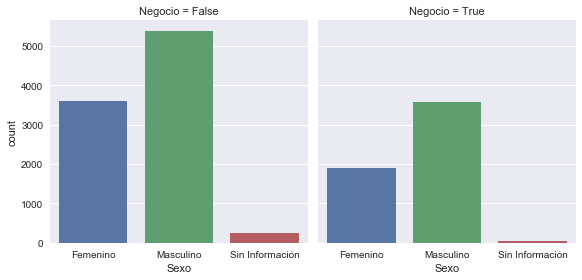

In [25]:
sb.factorplot(x='Sexo', col='Negocio', kind='count', data=cot_neg);

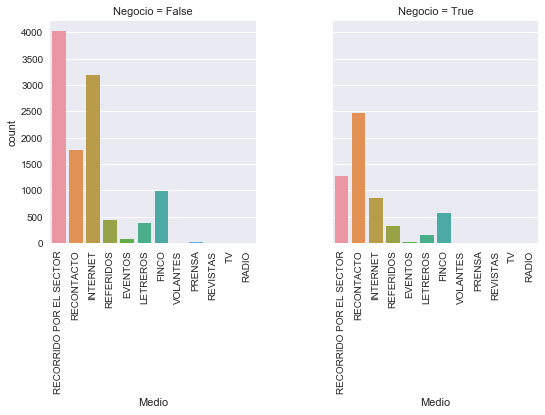

In [26]:
g = sb.factorplot(x='Medio', col='Negocio', kind='count', data=cot_neg);
g.set_xticklabels(rotation=90)

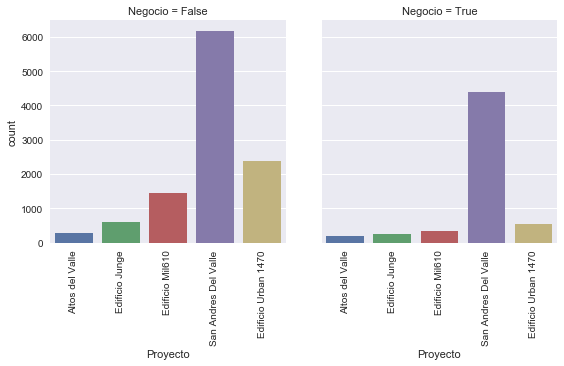

In [27]:
g = sb.factorplot(x='Proyecto', col='Negocio', kind='count', data=cot_neg);
g.set_xticklabels(rotation=90)

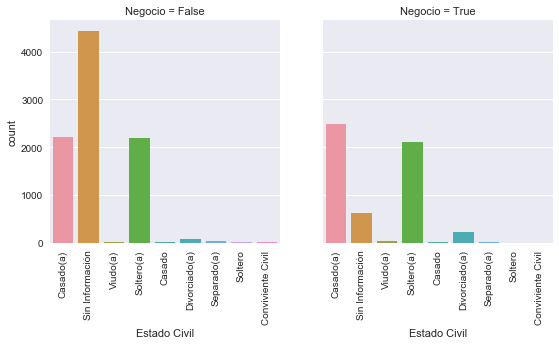

In [28]:
g = sb.factorplot(x='Estado Civil', col='Negocio', kind='count', data=cot_neg);
g.set_xticklabels(rotation=90)

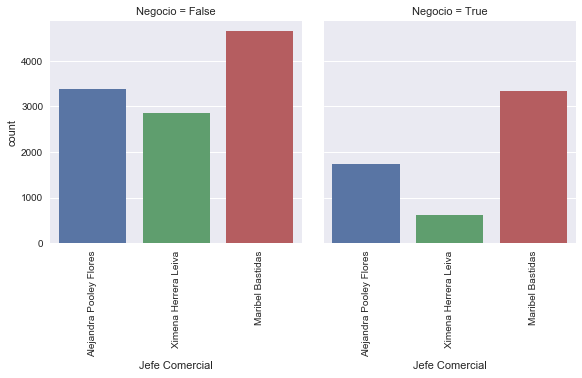

In [29]:
g = sb.factorplot(x='Jefe Comercial', col='Negocio', kind='count', data=cot_neg);
g.set_xticklabels(rotation=90)

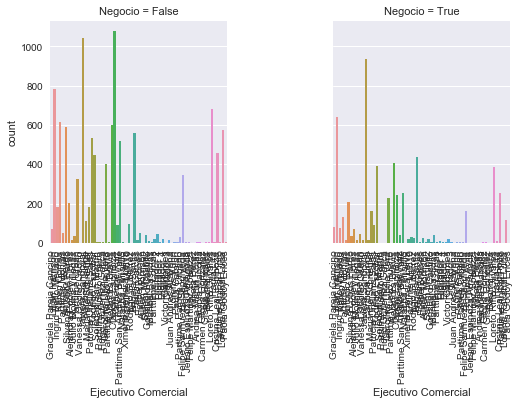

In [30]:
g = sb.factorplot(x='Ejecutivo Comercial', col='Negocio', kind='count', data=cot_neg);
g.set_xticklabels(rotation=90)

### Comparacion Edades

In [31]:
### Ver edades en cotizantes y cotizantes que llegan a negocios
rango_edad = cot_neg['Rango Edad'].tolist()
rango_edad_min = [];rango_edad_max = []

for e in rango_edad:
    try:
        edad = e.split('-')
        rango_edad_min.append(int(edad[0]))
        rango_edad_max.append(int(edad[1]))
    except (ValueError, AttributeError):
        rango_edad_min.append(0)
        rango_edad_max.append(0)

In [32]:
cot_neg['Edad Min'] = rango_edad_min
cot_neg['Edad Max'] = rango_edad_max

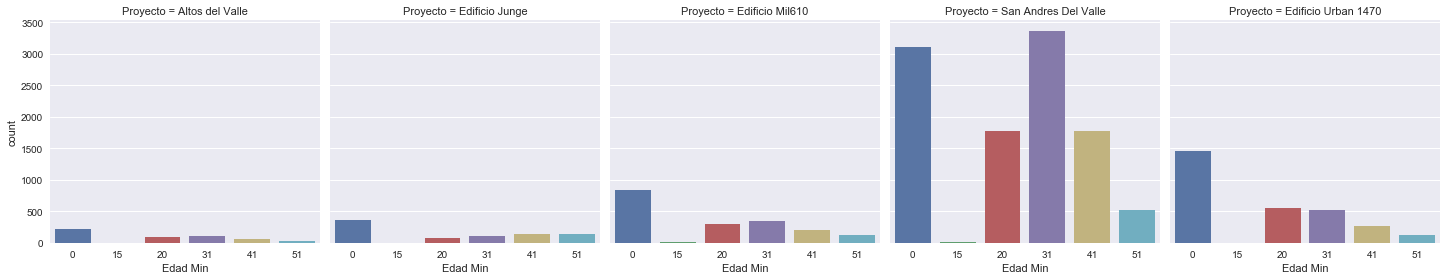

In [33]:
g = sb.factorplot(x='Edad Min', col='Proyecto', kind='count', data=cot_neg);

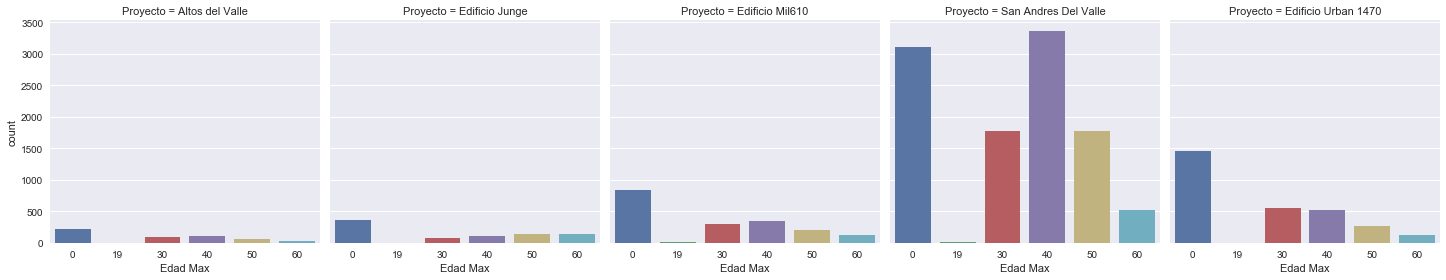

In [34]:
g = sb.factorplot(x='Edad Max', col='Proyecto', kind='count', data=cot_neg);

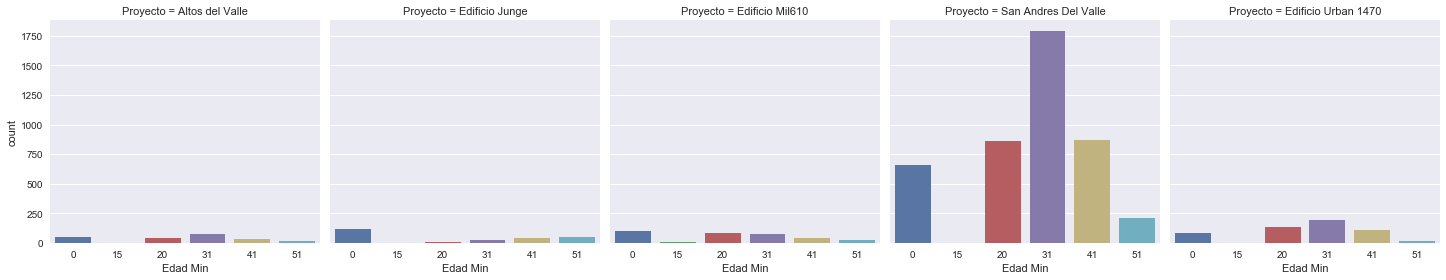

In [35]:
cot_neg_si = cot_neg[cot_neg['Negocio']==True]
g = sb.factorplot(x='Edad Min', col='Proyecto', kind='count', data=cot_neg_si);

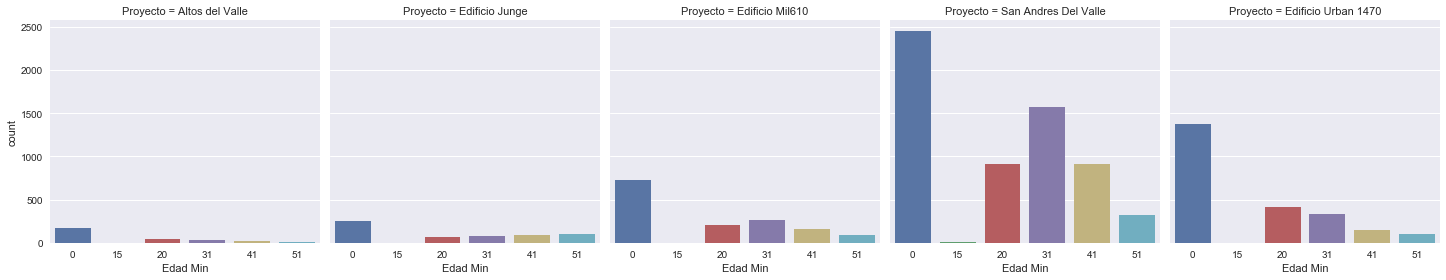

In [36]:
cot_neg_no = cot_neg[cot_neg['Negocio']==False]
g = sb.factorplot(x='Edad Min', col='Proyecto', kind='count', data=cot_neg_no);

### Comparacion Presenciales

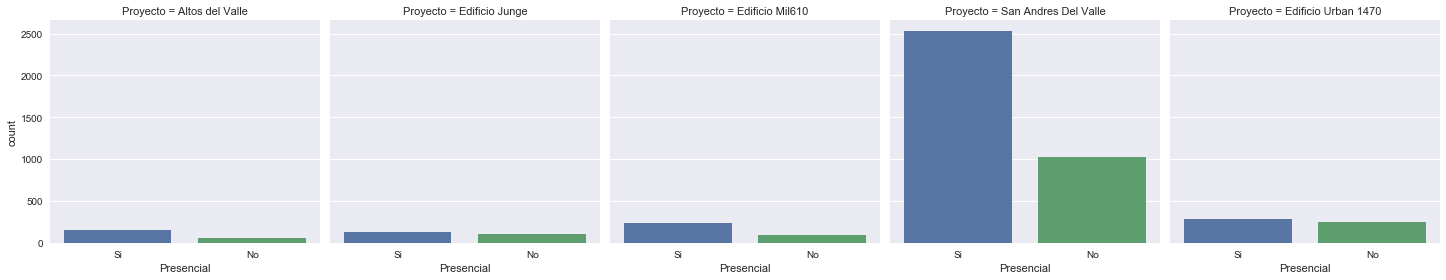

In [37]:
cot_neg_si = cot_neg[cot_neg['Negocio']==True]
g = sb.factorplot(x='Presencial', col='Proyecto', kind='count', data=cot_neg_si);

### Comparacion Grupos Familiares

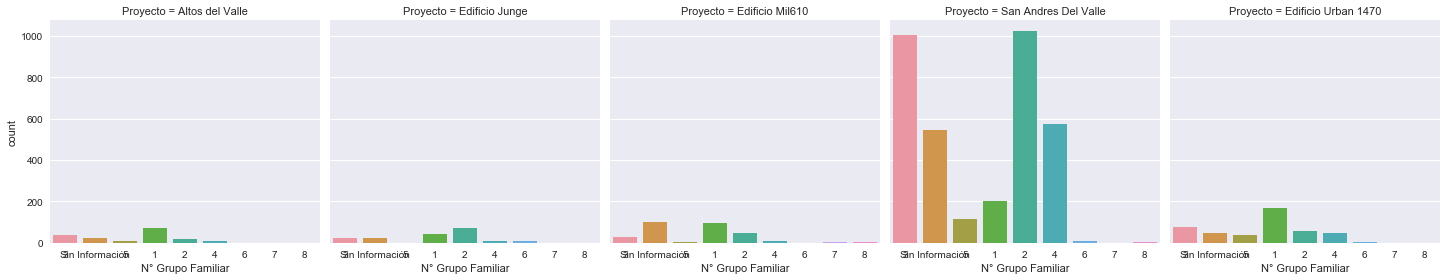

In [38]:
cot_neg_si = cot_neg[cot_neg['Negocio']==True]
g = sb.factorplot(x='N° Grupo Familiar', col='Proyecto', kind='count', data=cot_neg_si);

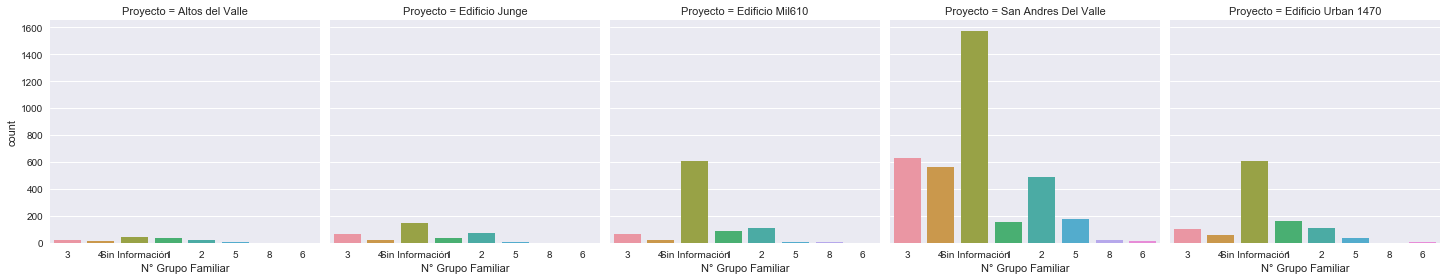

In [39]:
cot_neg_si = cot_neg[cot_neg['Negocio']==False]
g = sb.factorplot(x='N° Grupo Familiar', col='Proyecto', kind='count', data=cot_neg_si);

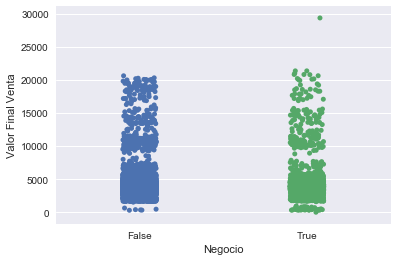

In [40]:
sb.stripplot(x='Negocio', y='Valor Final Venta', data=cot_neg, jitter=True)

In [41]:
# sb.swarmplot(x='Negocio', y='Valor Final Venta', data=cot_neg)

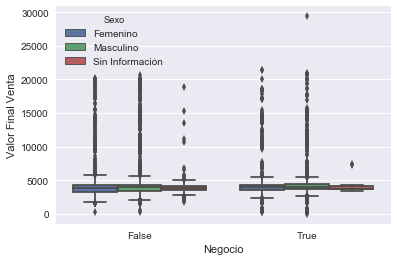

In [42]:
sb.boxplot(x='Negocio', y='Valor Final Venta',hue='Sexo', data=cot_neg)

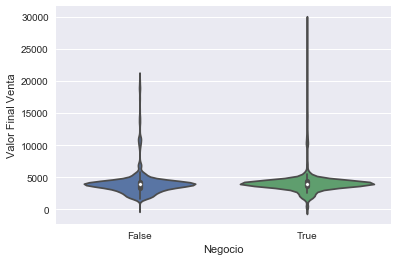

In [43]:
sb.violinplot(x='Negocio', y='Valor Final Venta', data=cot_neg)

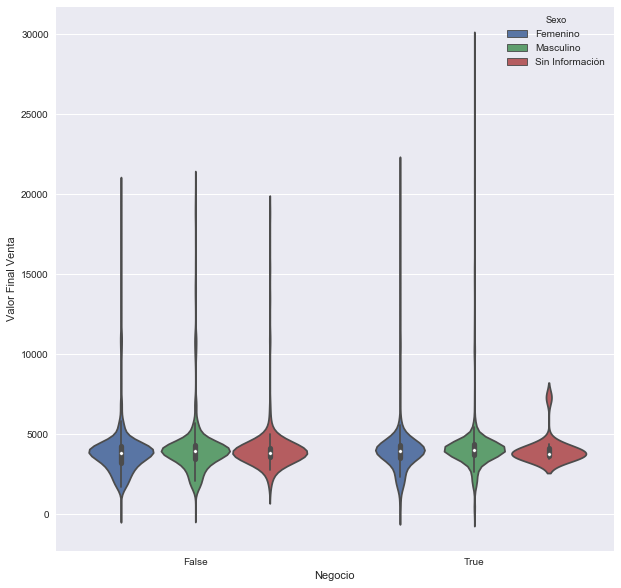

In [44]:
f = plt.figure(figsize=(10,10))
sb.violinplot(x='Negocio', y='Valor Final Venta',hue='Sexo', data=cot_neg)

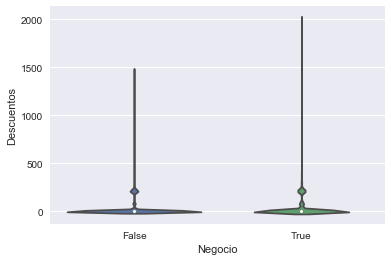

In [45]:
sb.violinplot(x='Negocio', y='Descuentos', data=cot_neg)

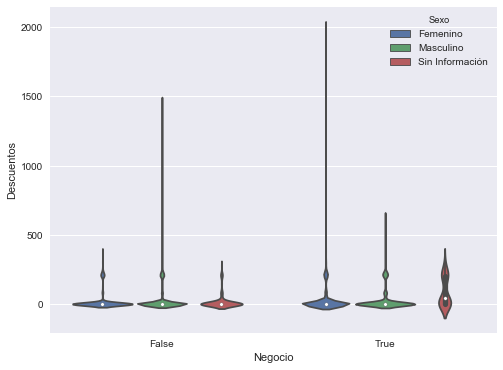

In [46]:
f = plt.figure(figsize=(8,6))
sb.violinplot(x='Negocio', y='Descuentos',hue='Sexo', data=cot_neg)

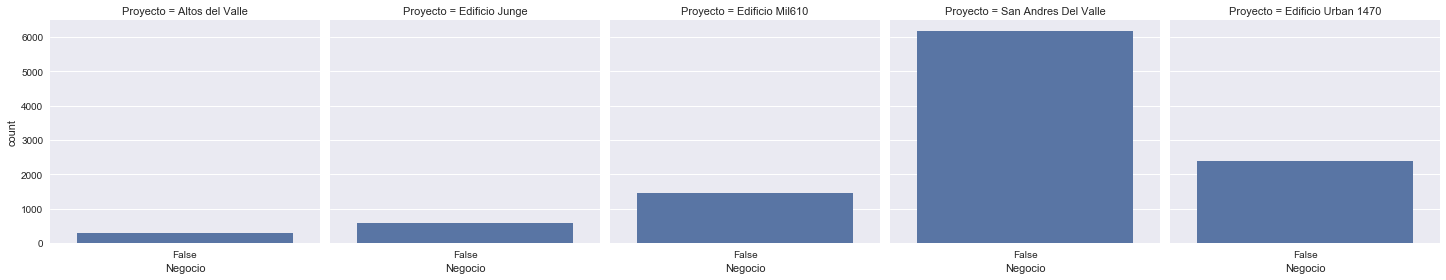

In [47]:
f = plt.figure(figsize=(8,10))
g = sb.factorplot(x='Negocio', col='Proyecto', kind='count', data=cot_neg_si);